# Resolució de l'equació de Gross-Pitaeskii

## Notes

Equació que es vol resoldre:

$$\left( -\frac{1}{2}\nabla^2+\frac{1}{2}r^2+4\pi a_s N |\psi|^2\right )\psi=\mu\psi$$

Fem la descomposició $\psi=\frac{R(r)}{r}Y_{00}$, on $Y_{00}=\frac{1}{\sqrt{4\pi}}$. Amb això ens queda:

$$\left( -\frac{1}{2}\frac{d^2}{dr^2}+\frac{1}{2}r^2+4\pi a_s N \left(\frac{R}{r}\frac{1}{\sqrt{4\pi}}\right)^2\right )R=\mu R \rightarrow \left( -\frac{1}{2}\frac{d^2}{dr^2}+\frac{1}{2}r^2+ a_s N \left(\frac{R}{r}\right)^2\right )R=\mu R$$

Aïllant la segona derivada tenim:
$$\frac{d^2R(r)}{dr^2}=\left(r^2+2 a_s N \left(\frac{R}{r}\right)^2-2\mu\right) R$$

I podem utilitzar el següent canvi de variable:

$$\frac{d R(r)}{dr}=p(r)$$

Per a tenir un sistema equacions diferencials ordinàries d'ordre 1:

$$\left \{ \begin{matrix}\frac{dp(r))}{dr}=\left(r^2+2 a_s N \left(\frac{R}{r}\right)^2-2\mu\right) R\\\frac{d R(r)}{dr}=p(r)\end{matrix}\right .$$

In [1]:
def simpson_integral(f, h):
        """Method to calculate integrals using Simpson's rule

        Args:
            f (array like): values of the function to integrate, separated by h
            h (float): step size

        Returns:
            float: integral value
        """        
        n = len(f)-1
        integral = sum(2*f[i] if i % 2 == 0 else 4*f[i] for i in range(1,n))
        integral+= f[0] + f[n]
        return integral * h / 3

valor de la normalització: 2.72
valor de la normalització: 2.37
valor de la normalització: 2.12
valor de la normalització: 1.68


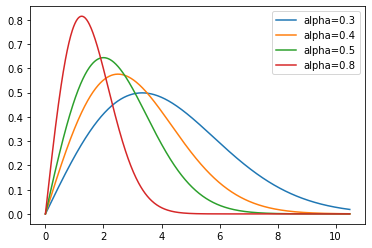

In [6]:
import numpy as np
import matplotlib.pyplot as plt
a0=0.00433  
n1=700 
step=0.015 
aa=1000000 
time=0.00005 
iteration=70000
alpha = [0.3,0.4,0.5,0.8]

for a in alpha:
    x=np.zeros(n1)
    R=np.zeros(n1)
    c=2*np.sqrt(a)**3/np.sqrt(np.sqrt(np.pi))
    
    for i in range(n1):
        x[i]=step*i
        R[i]=c*x[i]*np.exp(-0.5*(a**2)*(x[i]**2))
    plt.plot(x,R,label=f'alpha={str(a)}')
    plt.legend()
    integral = simpson_integral(R,x[1]-x[0])
    print(f"valor de la normalització: {integral:.2f}")

In [22]:
xprova = np.linspace(0,2*np.pi,1000000000)
step=xprova[1]-xprova[0]
prova_integracio = np.cos(xprova)
simpson_integral(prova_integracio,step)

In [8]:
from sympy import *

x1=symbols('x')
a1=symbols('a')

expression = (2*sqrt(a1)**3/sqrt(sqrt(pi)))*a1*exp(-0.5*(a1**2)*(x1**2))
expression



2*a**(5/2)*exp(-0.5*a**2*x**2)/pi**(1/4)

In [9]:
integral=integrate(expression,(x1,-oo,oo))
integral

Piecewise((2.82842712474619*pi**(1/4)*a**(3/2), 2*Abs(arg(a)) <= pi/2), (Integral(2*a**(5/2)*exp(-0.5*a**2*x**2)/pi**(1/4), (x, -oo, oo)), True))

In [15]:
import numpy as np
x1 = np.arange(9.0).reshape((3, 3))
print(x1)
x2 = np.arange(9.0).reshape((3, 3))
print(x2)
print(x1 * x2)

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[[ 0.  1.  4.]
 [ 9. 16. 25.]
 [36. 49. 64.]]


In [1]:
from grosspita import GrossPitaevskiiProblem

problem = GrossPitaevskiiProblem(100, 10, 0.1, 1, 1, 0.1, 100)
problem.integrate_problem()

Normalization: 2.0
[1.06225193e+00 1.05695393e+00 1.04121793e+00 1.01551017e+00
 9.80582122e-01 9.37434040e-01 8.87267396e-01 8.31429408e-01
 7.71353218e-01 7.08497406e-01 6.44288365e-01 5.80068615e-01
 5.17053524e-01 4.56298134e-01 3.98674940e-01 3.44862711e-01
 2.95345660e-01 2.50421725e-01 2.10218275e-01 1.74713309e-01
 1.43760166e-01 1.17113834e-01 9.44571599e-02 7.54255742e-02
 5.96292603e-02 4.66720926e-02 3.61669746e-02 2.77475181e-02
 2.10762412e-02 1.58496338e-02 1.18005530e-02 8.69846347e-03
 6.34804187e-03 4.58663389e-03 3.28099391e-03 2.32366667e-03
 1.62929336e-03 1.13104999e-03 7.77358533e-04 5.28954109e-04
 3.56345825e-04 2.37674402e-04 1.56945981e-04 1.02606540e-04
 6.64135882e-05 4.25594396e-05 2.70017499e-05 1.69607470e-05
 1.05476351e-05 6.49414938e-06 3.95864453e-06 2.38906405e-06
 1.42746719e-06 8.44425873e-07 4.94554301e-07 2.86763248e-07
 1.64622826e-07 9.35650537e-08 5.26495113e-08 2.93313513e-08
 1.61780754e-08 8.83443325e-09 4.77625590e-09 2.55654556e-09
 1.35

d:\EntregaMQ\Grosspitaevskii\grosspita.py:64: RuntimeWarning: divide by zero encountered in true_divide
  interaction_energy_term = interaction / 2 * psi ** 4 / x ** 2
d:\EntregaMQ\Grosspitaevskii\grosspita.py:64: RuntimeWarning: invalid value encountered in true_divide
  interaction_energy_term = interaction / 2 * psi ** 4 / x ** 2


0